# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Time transform options

<br></font>
</div>

# What is time transform?

<div class="alert alert-block alert-info">
<font color=black><br>

- Data transforms are intended to remove noise and improve the signal.
- There are no-one apply-to-all rule and it can be very difficult to select a good, or even best, transform for a given prediction problem.

<br></font>
</div>

# Import modules

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from numpy import sqrt, log
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20

# Import dataset

<div class="alert alert-block alert-info">
<font color=black><br>

-  The dataset is **non-stationary**, meaning that the mean and the variance of the bservations change over time. 
- This makes it difficult (**not impossible**) to model by both classical statistical methods, like ARIMA, and more sophisticated machine learning methods, like neural networks. 
- This is caused by what appears to be both an increasing trend and a seasonality component.
- In addition, the amount of change, or the variance, is increasing with time (look at the amplitude).

<br></font>
</div>

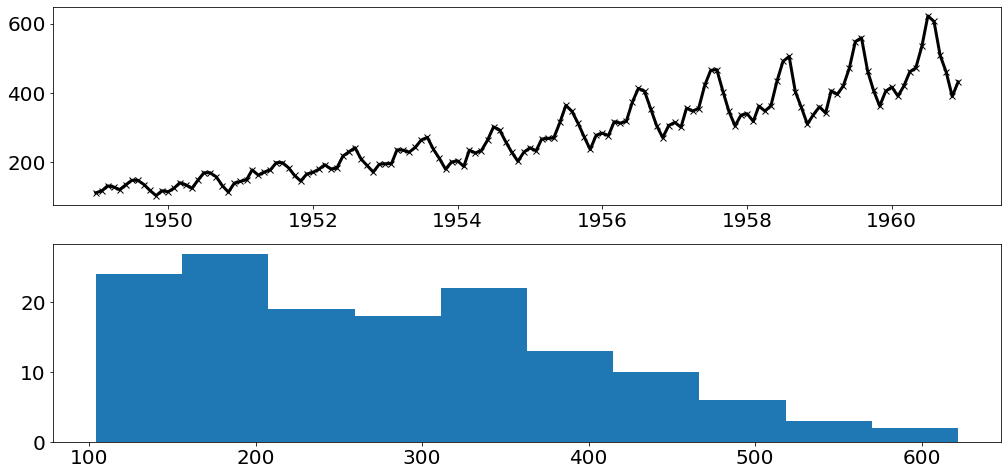

In [8]:
series = read_csv('../DATASETS/airline-passengers.csv', 
                  header=0, 
                  index_col=0, 
                  parse_dates=True,
                  squeeze=True)

pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series, "kx-", lw = 3)

# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

# Square root transform

<div class="alert alert-block alert-info">
<font color=black><br>

- A time series that has a quadratic growth trend can be made linear by taking the square root. 
- It is possible that the Airline Passengers dataset shows a quadratic growth. 
- If this is the case, then we couldexpect a square root transform to reduce the growth trend to be linear and change the distribution of observations to be perhaps nearly Gaussian. 
- We can see that the trend was reduced, but was **not removed**. The line  plot still shows an increasing variance from cycle to cycle. 
- The histogram still shows a **long tail** to the right of the distribution, suggesting an exponential or long-tail distribution.

<br></font>
</div>

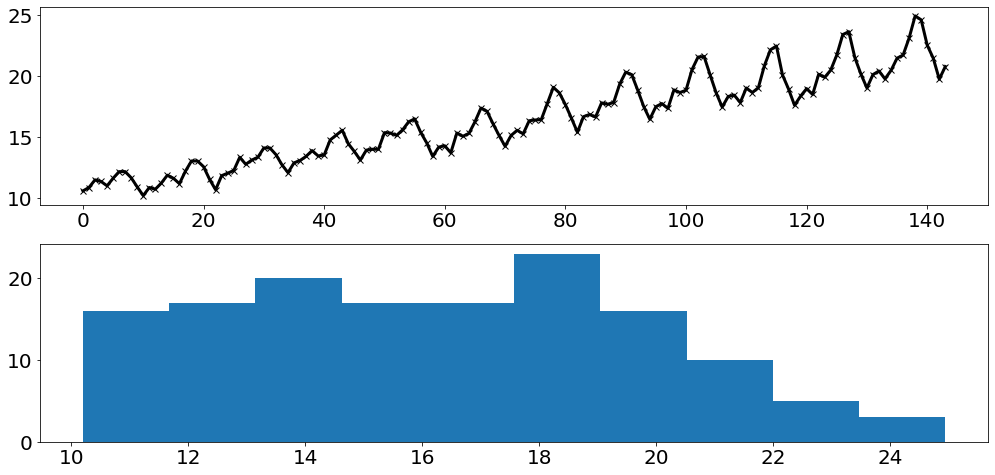

In [10]:
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers'] 
dataframe['passengers'] = sqrt(dataframe['passengers']) 
pyplot.figure(1)
# line plot
pyplot.subplot(211) 
pyplot.plot(dataframe['passengers'], "kx-", lw = 3)
# histogram
pyplot.subplot(212) 
pyplot.hist(dataframe['passengers'])
pyplot.show()

# Log transform

<div class="alert alert-block alert-info">
<font color=black><br>

- Time series with an exponential distribution can be made linear by taking the logarithm of the values. 
- The line plot shows a seemingly linear growth and variance. 
- The histogram also shows a more uniform or squashed Gaussian-like distribution of observations.
- It assumes values are **positive and non-zero**. It is common to transform observations by adding a fixed constant to ensure all input values meet this requirement. For example: transform = **log(constant + x)**

<br></font>
</div>

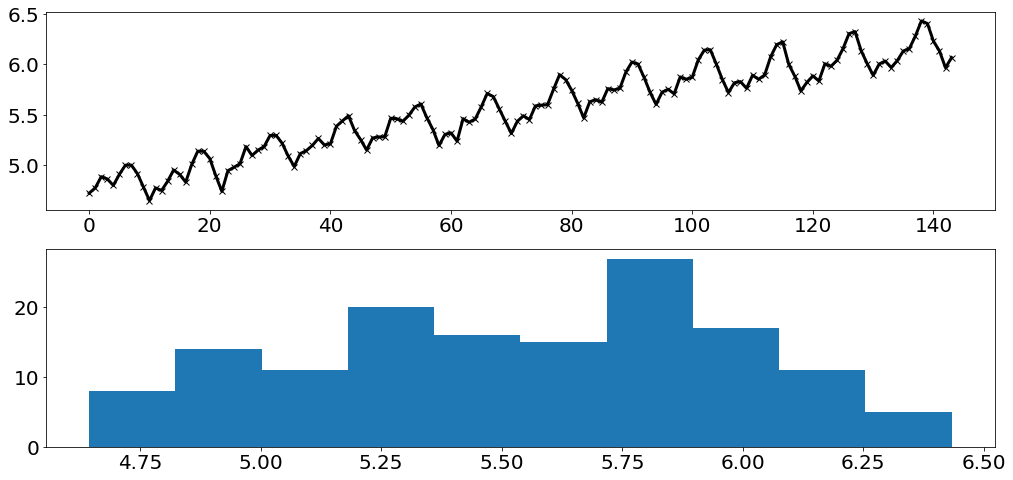

In [12]:
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers'] 
dataframe['passengers'] = log(dataframe['passengers']) 
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'], "kx-", lw = 3) 
# histogram
pyplot.subplot(212) 
pyplot.hist(dataframe['passengers']) 
pyplot.show()

# Box-Cox Transform

<div class="alert alert-block alert-info">
<font color=black><br>

- The Box-Cox transform is a **configurable** data transform method.
- It can be configured to evaluate a suite of transforms **automatically** and select a best fit. 
- Below are some common values for lambda:
    - lambda = None (the default) and let the  function find a statistically tuned value. 
    - lambda = -1.0 is a reciprocal transform.
    - lambda = -0.5 is a reciprocal square root transform. 
    - lambda = 0.0 is a log transform.
    - lambda = 0.5 is a square root transform.
    - lambda = 1.0 is no transform. 

<br></font>
</div>

Lambda: 0.148023


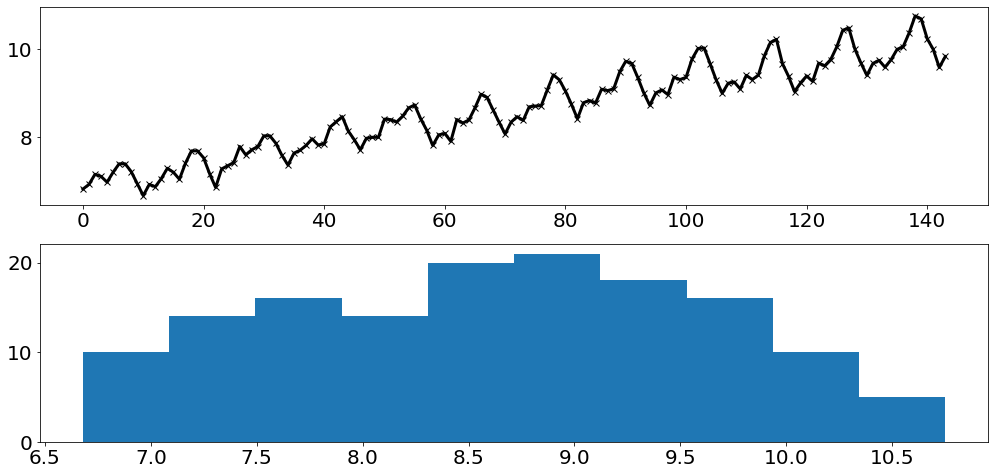

In [13]:
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers']) 
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'], "kx-", lw = 3)
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

# References

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/?s=time+series&post_type=post&submit=Search

</font>
</div>